<a class="anchor" id="0"></a>
#  NOVA IMS - Data Science and Advanced Analytics
# Machine learning Group project
# Income Prediction for the Newland citizens using Machine Learning
## Group 27
Members:
- Gabriel Cardoso (m20201027@novaims.unl.pt)
- João Chaves (m20200627@novaims.unl.pt)
- Nguyen Huy Phuc (m20200566@novaims.unl.pt)
- Anastasiia Tagiltseva (m20200041@novaims.unl.pt)


<a class="anchor" id="0.1"></a>
# **Table of Contents**

1. [Introduction](#1)
    - 1.1.[Import packages](#1.1)
    - 1.2.[Import data](#1.2)  
  
  
2. [Data preprocessing](#2)
   - 2.1. [First look at the data](#2.1)
        - 2.1.1 [Numeric Features](#2.1.1)
        - 2.1.2 [Categorical Features](#2.1.2)
   - 2.2 [Setting Dataframe](#2.2)
   - 2.3 [Feature engineering](#2.3)
        - 2.3.1 [Gender conversion by Title name](#2.3.1)
        - 2.3.2 [Age conversion by Birthday](#2.3.2)
   - 2.4 [Checking Feature Weight in Dependent Variable on Train Data](#2.4)
        - 2.4.1 [Native Continent](#2.4.1)
        - 2.4.2 [Lives with](#2.4.2)
        - 2.4.3 [Marital_Status](#2.4.3)
        - 2.4.4 [Employment sector](#2.4.4)
        - 2.4.5 [Role](#2.4.5)
        - 2.4.6 [Education level](#2.4.6)
        - 2.4.7 [Base area](#2.4.7)
        
        
3.	[Data Cleaning](#3)
   - 3.1 [Missing Values](#3.1)
   - 3.2 [Data inconsistency relates to project description](#3.2)
   - 3.3 [Outliers](#3.3)
   
   
4. [Feature engineering and encoding](#4)
   - 4.1 [Categorical features grouping](#4.1)
   - 4.2 [Ordinal Encoding](#4.2)
   - 4.3 [Weight of Evidence encoding](#4.3)
   - 4.4 [One-hot encoding](#4.4)
   - 4.5 [Scaling Data with MinMaxScaler Method](#4.5)
   
   
5. [Model selection](#5)
   - 5.1 [Cross validation with multiple models](#5.1)
   - 5.2 [Models assessment](#5.2)
        - 5.2.1 [Learning curve](#5.2.1)
        - 5.2.2 [Feature importance](#5.2.2)
   - 5.3 [Individual modelling](#5.3)
        - 5.3.1 [Logistic Regression](#5.3.1)
        - 5.3.2 [Neural Network](#5.3.2)
        - 5.3.3 [Random Forest](#5.3.3)
        - 5.3.4 [Gradient Boosting](#5.4.4)
   - 5.4 [Comparing models](#5.4)
   
   
6. [Model ensembles](#6)
   - 6.1 [Ensembling](#6.1)
   - 6.2 [Stacking](#6.2)
   - 6.3 [Final comparision](#6.3)
   
   
7. [Submission](#7)


8. [Appendix](#8)
   - 8.1 [Generalized Linear Mixed Model Encoding](#8.1)
   - 8.2 [Thresholds optimizing](#8.2)

# **1. Introduction** <a class="anchor" id="1"></a>

In 2048 the **Newland** government decided that residents should start paying taxes in order to make the new city more financially sustainable. They decided to apply a binary tax rate in which for people with an income below or equal to the average the rate would be 15% of income and for the remaining people 30% of their income. The first phase of this process is to identify the people who belong to each class. To this end, a first income analysis was made to 32500 people older than 17 years old, from which the government intends to create a predictive model to apply to people on their way to Newland.
Several groups of data scientists (including our group) were invited to create a predictive model based on a dataset of 22400 observations. This model will be applied to 10100 new observations (the test dataset) from which the government knows the value of income.

## **1.1. Import packages** <a class="anchor" id="1.1"></a>

In [1]:
#standard
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

#sklearn data_preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder,OrdinalEncoder,LabelEncoder
import phik
#sklearn categorical encoding
import category_encoders as ce

#sklearn modelling
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold, RandomizedSearchCV


#sklearn classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
#sklearn metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, f1_score,recall_score
from sklearn.metrics import roc_curve, roc_auc_score, auc, plot_roc_curve

#warnings
import warnings
warnings.filterwarnings("ignore")

## **1.2. Import data** <a class="anchor" id="1.2"></a>

In [2]:
# read a xlsx file 'Train' from current directory into DataFrame and save it to a variable called 'data'
data = pd.read_excel(os.path.join(os.getcwd(),'Train.xlsx'))
test_data = pd.read_excel(os.path.join(os.getcwd(),'Test.xlsx'))

In [3]:
#check the top of the datframe to ensure it loaded correctly
data.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


# **2. Data preprocessing** <a class="anchor" id="2"></a>

## 2.1 First look at the data <a class="anchor" id="2.1"></a>

In [4]:
# get data types
data.dtypes

CITIZEN_ID                 int64
Name                      object
Birthday                  object
Native Continent          object
Marital Status            object
Lives with                object
Base Area                 object
Education Level           object
Years of Education         int64
Employment Sector         object
Role                      object
Working Hours per week     int64
Money Received             int64
Ticket Price               int64
Income                     int64
dtype: object

In [5]:
#checking for all the null values
data.isnull().sum()

CITIZEN_ID                0
Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
Income                    0
dtype: int64

In [6]:
# set variables
target ='Income'
numeric_feats = data.columns[(data.dtypes != 'O') & (data.columns != target)].tolist()
categorical_feats = data.columns[data.dtypes == 'O'].tolist()

### 2.1.1. Numeric features <a class="anchor" id="2.1.1"></a>

In [7]:
numeric_feats

['CITIZEN_ID',
 'Years of Education',
 'Working Hours per week',
 'Money Received',
 'Ticket Price']

- After observing plots from numerical features, we will have two normalize all observations in other that they have a  more similar distribuition --> in order that, our model have a better accuracy/precision

### 2.1.2. Categorical features <a class="anchor" id="2.1.2"></a>

In [8]:
data.describe(include = ['O'])

,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Employment Sector,Role
count,22400,22400,22400,22400,22400,22400,22400,22400,22400
unique,16074,11257,5,7,6,40,16,9,15
top,Mr. Matt Hudson,"August 15,2025",Europe,Married,Wife,Northbury,Professional School,Private Sector - Services,Professor
freq,4,9,19111,10219,9012,20074,7232,15599,2849


In [9]:
# display all unique values for categorical variables
for item in data.columns:
    if data[item].dtype=='O':
        print('----------------------------',item,'----------------------------')
        print(data[item].unique())
        print('- Total unique values:',len(data[item].unique()), '\n')

---------------------------- Name ----------------------------
['Mr. Adam Glover' 'Mr. Cameron McDonald' 'Mr. Keith Davidson' ...
 'Mrs. Lisa Alsop' 'Miss Amelia Walker' 'Mr. Joseph Murray']
- Total unique values: 16074 

---------------------------- Birthday ----------------------------
[' July 1,2003' ' January 25,2006' ' May 10,2009' ... ' March 11,2008'
 ' April 5,1984' ' August 20,1987']
- Total unique values: 11257 

---------------------------- Native Continent ----------------------------
['Europe' 'Africa' 'Asia' 'America' 'Oceania']
- Total unique values: 5 

---------------------------- Marital Status ----------------------------
['Married' 'Single' 'Married - Spouse Missing' 'Divorced' 'Separated'
 'Widow' 'Married - Spouse in the Army']
- Total unique values: 7 

---------------------------- Lives with ----------------------------
['Wife' 'Other Family' 'Children' 'Other relatives' 'Alone' 'Husband']
- Total unique values: 6 

---------------------------- Base Area -------

After investigating the data, we carry out some early analysis:
- Genger can be generated using the title stated in 'Name' column
- Age of the citizen can be generated using the Birthday information
- Missing values in categorical features are represented under the value '?'
- Some categorical features have too many class, we will carry out further analysis to group these classes or engineer a new feature using Weight of Evidence assessment

## 2.2 Setting Dataframe <a class="anchor" id="2.2"></a>

In [10]:
# save to new variable
df = data.copy()
df_test = test_data.copy()

# to make it easier to work with columns
df.columns = df.columns.str.replace(' ', '_', regex=True)
df_test.columns = test_data.columns.str.replace(' ', '_', regex=True)

# Set index as citizen ID
df.set_index(['CITIZEN_ID'], inplace = True)
df_test.set_index(['CITIZEN_ID'], inplace = True)
numeric_feats.remove('CITIZEN_ID')

df

,Name,Birthday,Native_Continent,Marital_Status,Lives_with,Base_Area,Education_Level,Years_of_Education,Employment_Sector,Role,Working_Hours_per_week,Money_Received,Ticket_Price,Income
CITIZEN_ID,,,,,,,,,,,,,,
12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34881,Mrs. Lisa Alsop,"March 15,2023",Europe,Divorced,Children,Northbury,Professional School,12,Private Sector - Services,Cleaners & Handlers,40,0,0,0
34882,Mr. Julian Coleman,"March 7,2025",Europe,Single,Children,Northbury,Professional School,12,Private Sector - Services,Other services,35,0,0,0
34883,Miss Amelia Walker,"July 20,2022",Europe,Single,Other Family,Northbury,Masters,17,Public Sector - Others,Professor,40,2674,0,0


## 2.3 Feature engineering <a class="anchor" id="2.3"></a>

### 2.3.1 Gender conversion by Title name <a class="anchor" id="2.3.1"></a>

In [11]:
def gender_generator(df):
    df.columns = df.columns.str.replace(' ', '_', regex=True)
    #converting column datatype to str to use string manipulation
    df['Name'] = df['Name'].astype(str)
    #first string before '.'
    df['Name_gender'] = df['Name'].str.split('.').str[0]
    #in order to don't miss out on anyone that hasnt a Mr or Mrs 
    df['Name_gender'] = df['Name_gender'].replace(' ', '.', regex=True)
    df['Name_gender'] = df['Name_gender'].str.split('.').str[0]
    #  female = 1 and male = 0
    def binary_gender(x):
        if str(x) == 'Mrs' or str(x) == 'Miss':
            return 'Female'
        else:
            return 'Male'
    df['Name_gender'] = df['Name_gender'].apply(binary_gender)
    df.rename(columns = {'Name_gender':'Sex'}, inplace = True)
    df = df.drop(['Name'], axis=1)
    return df

# apply on dataframe
df = gender_generator(df)
df_test = gender_generator(df_test)
# update the feature list
categorical_feats.remove('Name')

### 2.3.2 Age conversion by Birthday <a class="anchor" id="2.3.2"></a>

In [12]:
def age_generator(df): 
    #converting Birthday to age(int), current year is 2048
    df['Birthday'] = df['Birthday'].astype(str)
    df['Age'] = df['Birthday'].str.split(',').str[1]
    df['Age'] = df["Age"].apply(lambda x : 2048 - int(x))
    df = df.drop(['Birthday'], axis=1)
    return df

# apply on dataframe
df = age_generator(df)
df_test = age_generator(df_test)
# update the feature list
categorical_feats.remove('Birthday')

## 2.4. Checking Feature Weight in Dependent Variable on Train Data <a class="anchor" id="2.4"></a>

In [13]:
def weight_of_variable(df, column, target, sortby = 'Total count'):
    # Count total observations
    total = df[[column, target]].groupby(by = column,).count().sort_values(by = target, ascending = False)
    # Count
    with_target = df[[column, target]].groupby(by = column).sum().sort_values(by = target, ascending = False)
    
    weight = (df[[column, target]].groupby(by = column).sum().sort_values(by = target, ascending = False) / 
    (df[[column, target]].groupby(by = column).count().sort_values(by = target, ascending = False))).sort_values(by = target, ascending = False)
    
    concat_df = pd.concat([total, with_target, weight],axis = 1)
    
    out = pd.DataFrame(concat_df.values,index=concat_df.index, columns=['Total count', 'Tax payers count', 'Weight'])
    # Explore feature vs target by catplot
    
    g = sns.catplot(x=target,y=column,data=df,kind="bar", size = 6 , palette = "muted",orient='h',height=.5, aspect=2)
    g.despine(left=True)
    g.fig.set_figwidth(8)
    g.fig.set_figheight(3*ceil(len(df[column].unique())/10))
    g.set_ylabels("Income probability")
    # Rotate the labels
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(-45)

    return out.astype({'Total count':'int', 'Tax payers count':'int64'}).sort_values(by = sortby ,ascending = False)

### 2.4.1 Native Continent <a class="anchor" id="2.4.1"></a>

,Total count,Tax payers count,Weight
Europe,19111,4832,0.252839
Africa,2187,260,0.118884
Asia,699,181,0.258941
America,219,25,0.114155
Oceania,184,13,0.070652


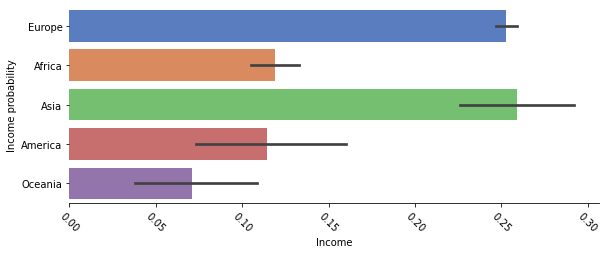

In [14]:
weight_of_variable(df,column='Native_Continent',target='Income',sortby='Total count')

### 2.4.2 Lives with <a class="anchor" id="2.4.2"></a>

,Total count,Tax payers count,Weight
Wife,9012,3971,0.440635
Other Family,5777,604,0.104553
Children,3519,48,0.013640
Alone,2362,161,0.068163
Husband,1049,504,0.480458
Other relatives,681,23,0.033774


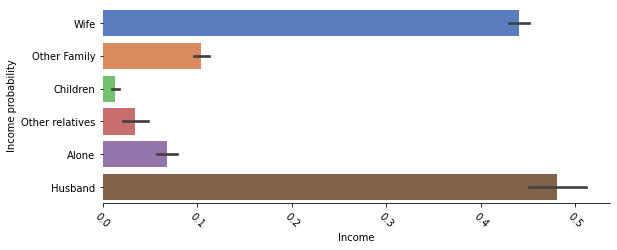

In [15]:
weight_of_variable(df,column='Lives_with',target='Income',sortby='Total count')

### 2.4.3. Marital_Status <a class="anchor" id="2.4.3"></a>

,Total count,Tax payers count,Weight
Married,10219,4488,0.439182
Single,7416,354,0.047735
Divorced,3072,327,0.106445
Separated,699,44,0.062947
Widow,696,62,0.089080
Married - Spouse Missing,284,29,0.102113
Married - Spouse in the Army,14,7,0.500000


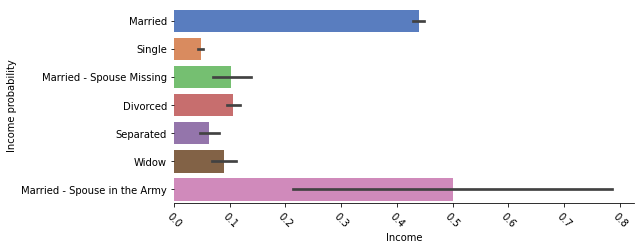

In [16]:
weight_of_variable(df,'Marital_Status','Income')

- `Lives_With`:
 - Based on the weight analysis, we are able to observe that people who live with wife or husband have significantly high percentage of having high income. This could be because they have develop a good career and settle down, thus their income status should be better.  
 - Followed by people who is living with other family or single, this could be young people who have just get a job and still not able to afford for their own accomodation yet.  
 - And finally, people who live with children can be highly a widow or broken mariage, thus their status of economy could be more harsh  
 - **Therefore, we decide to divide the variable into 3 group as discussed above in the upcoming section**

### 2.4.4. Employment sector <a class="anchor" id="2.4.4"></a>

,Total count,Tax payers count,Weight
Private Sector - Services,15599,3365,0.215719
Self-Employed (Individual),1764,501,0.284014
Public Sector - Others,1419,398,0.280479
?,1264,136,0.107595
Private Sector - Others,880,228,0.259091
Self-Employed (Company),763,415,0.543906
Public Sector - Government,692,268,0.387283
Unemployed,12,0,0.000000
Never Worked,7,0,0.000000


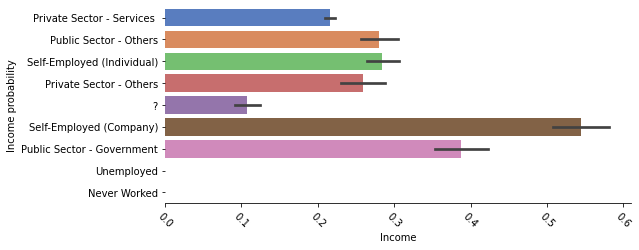

In [17]:
weight_of_variable(df,'Employment_Sector','Income')

Suggestion: OneHotEncoding technique since there is a lower amount of features and theirs weight is actually pretty similar

### 2.4.5. Role <a class="anchor" id="2.4.5"></a>

,Total count,Tax payers count,Weight
Professor,2849,1265,0.444015
Management,2797,1346,0.481230
Repair & constructions,2795,618,0.221109
Administratives,2608,362,0.138804
Sales,2531,663,0.261952
Other services,2287,89,0.038916
Machine Operators & Inspectors,1384,163,0.117775
?,1271,136,0.107002
Transports,1071,210,0.196078
Cleaners & Handlers,922,58,0.062907


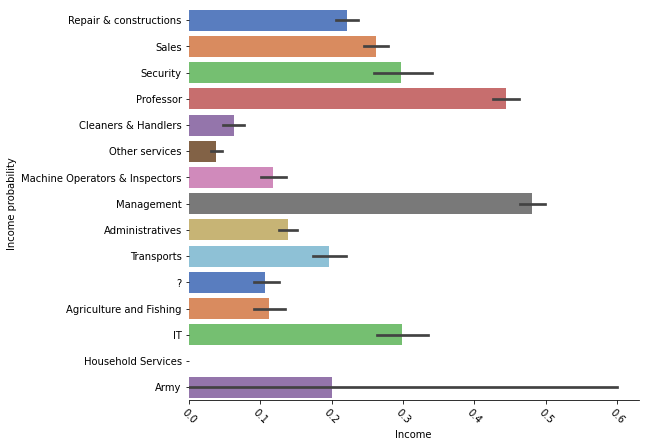

In [18]:
weight_of_variable(df,'Role','Income')

Suggestion:Grouping by importance in feature Income  --> like Ordinal Incoder(order of variables actually matters for income discrimination)
 - Tier 1(Management,Professor);
 - Tier 2(IT,Security,Sales);
 - Tier 3(Repair & constructions,Army,Transports);
 - Tier 4(Administratives,Machine Operators & Inspectors,Agriculture and Fishing);
 - Tier 5(Cleaners & Handlers,Other services,Household Services).

### 2.4.6. Education level <a class="anchor" id="2.4.6"></a>

,Total count,Tax payers count,Weight
PhD,289,214,0.740484
Masters + PostGraduation,397,283,0.712846
Masters,1193,650,0.544845
Bachelors + PostGraduation,3696,1503,0.406656
Professional School + PostGraduation,953,245,0.257083
Bachelors,735,180,0.244898
High School + PostGraduation,4994,926,0.185423
Professional School,7232,1141,0.157771
High School Complete,287,28,0.097561
Middle School - 2nd Cycle,432,29,0.067130


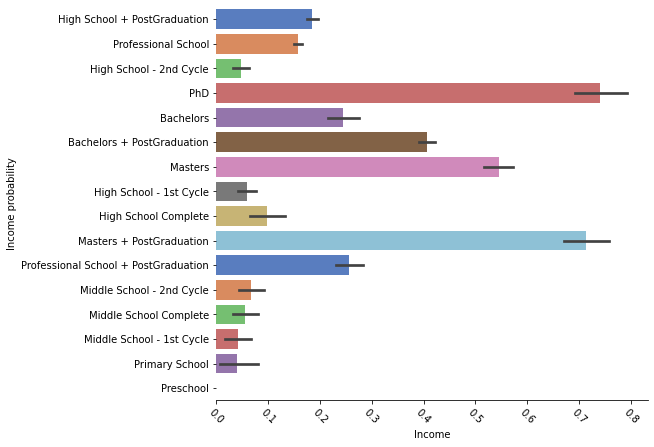

In [19]:
weight_of_variable(df,'Education_Level','Income',sortby = 'Weight')

Suggestion:Grouping by importance in feature Income  --> like Ordinal Incoder(order of variables actually matters for income discrimination)
 - Tier 1(Phd,Masters + PostGraduation);
 - Tier 2(Masters)
 - Tier 3(Bachelors + PostGraduation)
 - Tier 4(Bachelors,Professional School + PostGraduation)
 - Tier 5(High School + PostGraduation,Professional School);
 - Tier 6(High School Complete,etc...)

### 2.4.7. Base area <a class="anchor" id="2.4.7"></a>

,Total count,Tax payers count,Weight
Kald,19,9,0.473684
Sharnwick,70,29,0.414286
Laenteglos,32,13,0.406250
Knife's Edge,37,15,0.405405
Eelry,56,21,0.375000
Kirkwall,40,14,0.350000
Alverton,135,43,0.318519
Watford,83,26,0.313253
Butterpond,96,30,0.312500
Middlesbrough,10,3,0.300000


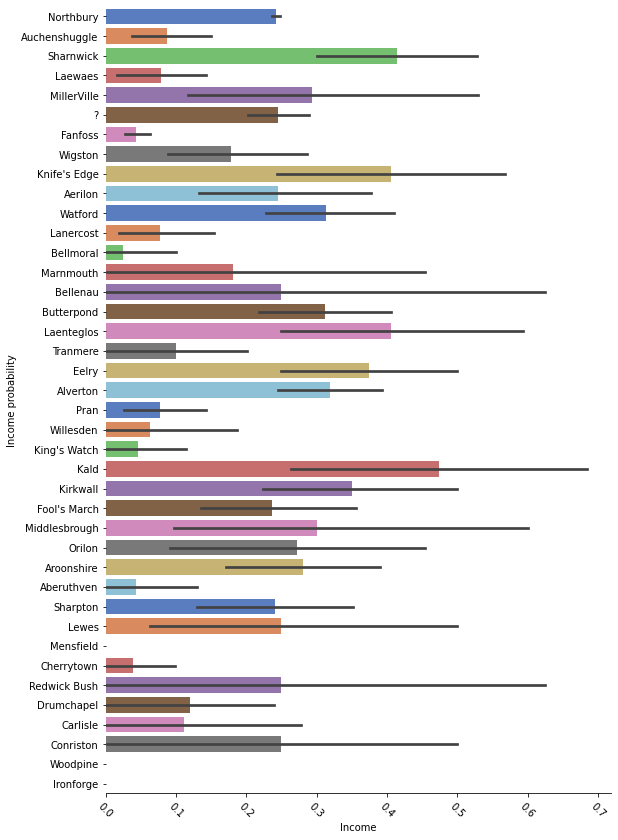

In [20]:
weight_of_variable(df,'Base_Area','Income',sortby='Weight')

### Notes on the section:
- These Feature Importance was in order to have a better understanding of the relation of each feature's category with the dependent variable(Income);
- This will serve as a reference for future categorical encoding above in section 3 --> So, each category can have a value that can translate the distance/similarity between categories and Income feature

# 3. Data Cleaning <a class="anchor" id="3"></a>

## 3.1. Missing Values <a class="anchor" id="3.1"></a>

In [21]:
#replace '?' with NaN value to easily detect
df.replace( '\?', np.nan, regex=True, inplace = True)
df_test.replace( '\?', np.nan, regex=True, inplace = True)
# Check for missins values in each features
# missing values in each feature
print('----------- Train dataset % missing -------------')
percent_missing = (df.isna().sum()) * 100/len(df)
print(round(percent_missing[percent_missing>0].sort_values(ascending = False),2))
print('----------- Test dataset % missing -------------')
percent_missing_test = (df_test.isna().sum()) * 100/len(df)
print(round(percent_missing_test[percent_missing_test>0].sort_values(ascending = False),2))

----------- Train dataset % missing -------------
Role                 5.67
Employment_Sector    5.64
Base_Area            1.76
dtype: float64
----------- Test dataset % missing -------------
Role                 2.54
Employment_Sector    2.54
Base_Area            0.83
dtype: float64


In [22]:
df.isna().sum().loc[df.isna().sum() > 0].index

Index(['Base_Area', 'Employment_Sector', 'Role'], dtype='object')

As we can see (in the figure above) the data set contains a certain set of missing values for categorical features: Role, Employment Sector, Base Area 

In [23]:
# Fill NaN values in categorical features using mode
contain_NA_feats = ['Base_Area', 'Employment_Sector', 'Role']
modes = df[contain_NA_feats].mode().loc[0]
df.fillna('Unknown',inplace = True)
df_test.fillna('Unknown',inplace = True)

We decided handled the missing values for every attribute by setting a default marker called ‘Unknown’ and assigning a unique category for negating information loss.

In [24]:
df.isna().sum()

Native_Continent          0
Marital_Status            0
Lives_with                0
Base_Area                 0
Education_Level           0
Years_of_Education        0
Employment_Sector         0
Role                      0
Working_Hours_per_week    0
Money_Received            0
Ticket_Price              0
Income                    0
Sex                       0
Age                       0
dtype: int64

In [25]:
df_test.isna().sum()

Native_Continent          0
Marital_Status            0
Lives_with                0
Base_Area                 0
Education_Level           0
Years_of_Education        0
Employment_Sector         0
Role                      0
Working_Hours_per_week    0
Money_Received            0
Ticket_Price              0
Sex                       0
Age                       0
dtype: int64

## 3.2. Data inconsistency relates to project description <a class="anchor" id="3.2"></a>

In [26]:
# people in data have to be older than 17 years old, let's check 
df.groupby('Role').Age.agg(['min', 'max'])

,min,max
Role,,
Administratives,17,90
Agriculture and Fishing,17,90
Army,23,46
Cleaners & Handlers,17,90
Household Services,17,77
IT,17,73
Machine Operators & Inspectors,17,90
Management,17,90
Other services,17,90


In [27]:
df[df['Role']=='Professor'].Education_Level.unique()

array(['PhD', 'Bachelors + PostGraduation', 'Masters + PostGraduation',
       'High School + PostGraduation', 'Masters', 'Bachelors',
       'Professional School', 'Professional School + PostGraduation',
       'High School - 2nd Cycle', 'High School Complete',
       'High School - 1st Cycle', 'Middle School Complete',
       'Middle School - 2nd Cycle', 'Preschool', 'Primary School'],
      dtype=object)

## 3.3. Outliers <a class="anchor" id="3.3"></a>

In [28]:
# define the function to remove outliers using the IQR method
def remove_outlier(df_in, col_name):
    q25 = df_in[col_name].quantile(0.25)
    q75 = df_in[col_name].quantile(0.75)
    iqr = q75-q25 #Interquartile range
    lower_lim  = q25-1.5*iqr
    upper_lim = q75+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > lower_lim) & (df_in[col_name] < upper_lim)]
    return df_out

In [29]:
df.columns

Index(['Native_Continent', 'Marital_Status', 'Lives_with', 'Base_Area',
       'Education_Level', 'Years_of_Education', 'Employment_Sector', 'Role',
       'Working_Hours_per_week', 'Money_Received', 'Ticket_Price', 'Income',
       'Sex', 'Age'],
      dtype='object')

**Year of education**

In [30]:
clean_years = remove_outlier(df, 'Years_of_Education')
clean_years.reset_index(drop=True, inplace=True)
print('Deleted rows:', (df.shape[0] - clean_years.shape[0]),'Percentage of data kept after removing outliers:', np.round(clean_years.shape[0] / df.shape[0]*100, 2), sep='\n')

Deleted rows:
681
Percentage of data kept after removing outliers:
96.96


**Working hours per week**

In [31]:
clean_hours = remove_outlier(df, 'Working_Hours_per_week')
clean_hours.reset_index(drop=True, inplace=True)
print('Deleted rows:', (df.shape[0] - clean_hours.shape[0]),'Percentage of data kept after removing outliers:', np.round(clean_hours.shape[0] / df.shape[0]*100, 2), sep='\n')

Deleted rows:
6225
Percentage of data kept after removing outliers:
72.21


**Age**

In [32]:
clean_age = remove_outlier(df, 'Age')
clean_age.reset_index(drop=True, inplace=True)
print('Deleted rows:', (df.shape[0] - clean_age.shape[0]),'Percentage of data kept after removing outliers:', np.round(clean_age.shape[0] / df.shape[0]*100, 2), sep='\n')

Deleted rows:
116
Percentage of data kept after removing outliers:
99.48


Run the code bellow to apply outliner removal

In [33]:
# Apply out outliner removal:
#df = remove_outlier(df, 'Years_of_Education')
#df = remove_outlier(df, 'Age')

In [34]:
#Check for length of dataset with outliers removed
len(df)

22400

# 4. Feature engineering and encoding: <a class="anchor" id="4"></a>

## 4.1. Categorical features grouping <a class="anchor" id="4.1"></a>

**Apply Phi_K to measure correlation coeffictient of all features together**  

Phi_K is a new and practical correlation coefficient based on several refinements to Pearson’s hypothesis test of independence of two variables.

In [35]:
phik = df.phik_matrix()

interval columns not set, guessing: ['Years_of_Education', 'Working_Hours_per_week', 'Money_Received', 'Ticket_Price', 'Income', 'Age']


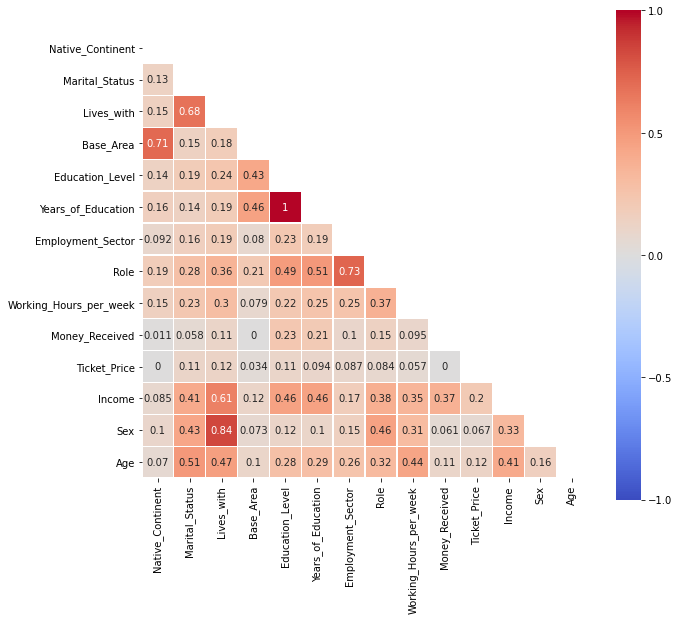

In [36]:
mask = np.zeros_like(phik, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 15)) 
heatmap = sns.heatmap(phik, 
                      square = True,
                      mask = mask,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .6, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.2g',
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})
#add the column names as labels
ax.set_yticklabels(phik.columns, rotation = 0)
ax.set_xticklabels(phik.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

From the heatmap above we can see strong correlation (>0.8) between features Years_of_Education and Education_level and another pair are Sex and Lives_with.  The most straight-forward method is to remove some variables that are highly correlated to others (Education_level and Sex) and leave the more significant ones in the set. 

To fix multi-collinearity issue, we decided transform some of the variables to make them less correlated but still maintain their feature and one hot encoding.

In [37]:
df_group_category = df.copy()
df_test_group_category = df_test.copy()

In [38]:
def group_marital_status(x):
    if str(x) == 'Single':
        return 'Single'
    elif str(x) == 'Married - Spouse in the Army' or str(x) == 'Married':
        return 'Married'
    elif str(x) == 'Married - Spouse Missing' or str(x) == 'Separated' or str(x) == 'Widow':
        return 'Married but Single'
    else:
        return 'Other marital'

def group_employment(x):
    if str(x) == 'Self-Employed (Company)':
        return 'Self-Employed (Company)'
    elif str(x) == 'Public Sector - Government':
        return 'Public Sector - Government'
    elif str(x) == 'Self-Employed (Individual)': 
        return 'Self-Employed (Individual)'
    elif str(x) == 'Private Sector - Services ' or str(x) == 'Private Sector - Others':
        return 'Private Sector'
    elif str(x) == 'Public Sector - Others':
        return 'Public Sector - Others'
    elif str(x) == 'Unknown':
        return 'Unknown'
    else:
        return 'Other employment'  
def group_role(x):
    if str(x) == 'Management' or str(x) == 'Professor':
        return 'Very High'
    elif str(x) == 'IT' or str(x) == 'Security' or str(x) == 'Sales':
        return 'High'
    elif str(x) == 'Repair & constructions' or str(x) == 'Army' or str(x) == 'Transports':
        return 'Medium'
    elif str(x) == 'Administratives' or str(x) == 'Machine Operators & Inspectors' or str(x) == 'Agriculture and Fishing':
        return 'Low'
    elif str(x) == 'Unknown':
        return 'Unknown'
    else:
        return 'Other role'
def group_education(x):
    if str(x) == 'Phd' or str(x) == 'Masters + PostGraduation':
        return 'Post_Masters'
    elif str(x) == 'Masters':
        return 'Masters'
    elif str(x) == 'Bachelors + PostGraduation':
        return 'Post_Grad'
    elif str(x) == 'Bachelors' or str(x) == 'Professional School + PostGraduation':
        return 'Bachelor'
    elif str(x) == 'High School + PostGraduation' or str(x) == 'Professional School':
        return 'No_Bachelor'
    else:
        return 'Without_high_education'
def group_lives_with(x):
    if str(x) == 'Husband' or str(x) == 'Wife':
        return 'Settled'
    elif str(x) == 'Children':
        return 'Dependee'
    else:   
        return 'Other live with'    

- We did not apply grouping on Native Continent because the feature already has a fairly good number of levels
- For Base_Area, as this feature has too high number of levels and we can not able to group it effectively using this manual method. We will apply Weight of Evidence encoding for this feature later

In [39]:
# Select feature to apply the grouping method
features_apply = ['Marital_Status', 'Lives_with', 'Education_Level', 'Employment_Sector', 'Role']
# define dict of function to apply for each feature, except for sex, native_continent and base_area
group_func_dict = {'Marital_Status': group_marital_status,
                   'Lives_with': group_lives_with,
                   'Education_Level' :group_education,
                   'Employment_Sector' :group_employment,
                   'Role' :group_role}

def apply_group(df_apply,feats,dict_func):
    df_out = df_apply.copy()
    for feature in feats:
        df_out[feature] = df_apply[feature].apply(dict_func[feature])
    return df_out

# Now apply the grouping on categorical features
df_group_category = apply_group(df, features_apply, group_func_dict)
df_test_group_category = apply_group(df_test, features_apply, group_func_dict)

In [40]:
# Apply to the main data
df = df_group_category
df_test = df_test_group_category

**Apply Phi_K to measure correlation coeffictient of all features together**  

Phi_K is a new and practical correlation coefficient based on several refinements to Pearson’s hypothesis test of independence of two variables.

In [41]:
phik = df_group_category.phik_matrix()

interval columns not set, guessing: ['Years_of_Education', 'Working_Hours_per_week', 'Money_Received', 'Ticket_Price', 'Income', 'Age']


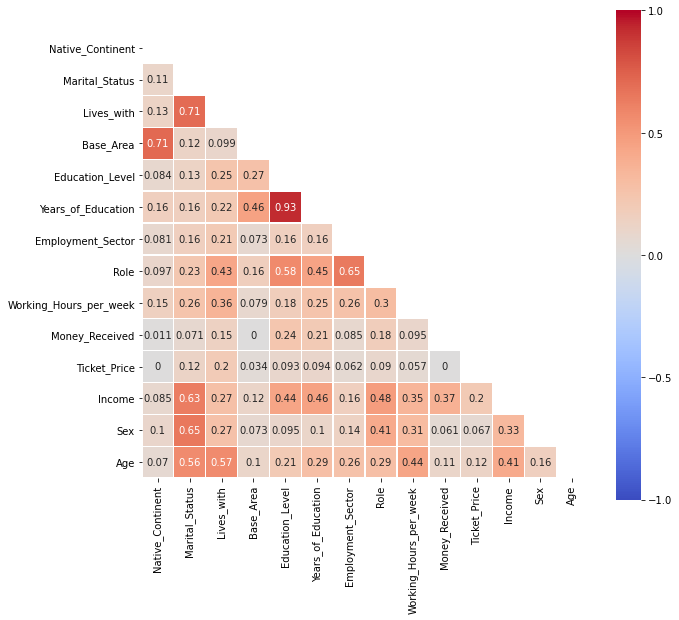

In [42]:
mask = np.zeros_like(phik, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 15)) 
heatmap = sns.heatmap(phik, 
                      square = True,
                      mask = mask,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .6, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.2g',
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})
#add the column names as labels
ax.set_yticklabels(phik.columns, rotation = 0)
ax.set_xticklabels(phik.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

The correlation results after this became much more acceptable, and we were able to include all other variables as model features.

**The feature ‘Education_level’ was removed instead of ‘Years_of_Education’ because according to matrix relation between ‘Income’ and ‘Years_of_Education’ is stronger.**

In [43]:
df = df.drop(['Education_Level'], axis = 1)
df_test = df_test.drop(['Education_Level'], axis = 1)

## 4.2. Ordinal Encoding: <a class="anchor" id="4.2"></a>

### <font color='red'> Note: This section is for reference only. Skip running this section as we already use the categorical grouping method </font>

In this encoding technique, we will encode base on the rank of weighted classes of each features. The classes that have higher weight in the proportion of tax payer will be encoded with higher ordinal value. Thus, the class with lowest proportion will be encoded 0

In [44]:
# Copy to a new dataset to apply manual encoding
df_enc_manual = df.copy()
df_test_enc_manual = df_test.copy()

In [45]:
def m_enc_native_continent(x):
    if str(x) == 'Europe':
        return 4
    elif str(x) == 'Asia':
        return 3
    elif str(x) == 'Africa':
        return 2
    elif str(x) == 'America':
        return 1
    else:
        return 0
    
def m_enc_base_area(x):
    if str(x) == 'Northbury':
        return 1
    else:
        return 0

def m_enc_marital_status(x):
    if str(x) == 'Single' or str(x) == 'Married - Spouse Missing' or str(x) == 'Separated' or str(x) == 'Widow':
        return 0
    elif str(x) == 'Married - Spouse in the Army' or str(x) == 'Married':
        return 2
    else:
        return 1
    
def m_enc_employment(x):
    if str(x) == 'Self-Employed (Company)':
        return 5
    elif str(x) == 'Public Sector - Government':
        return 4
    elif str(x) == 'Self-Employed (Individual)': 
        return 3
    elif str(x) == 'Private Sector - Services ' or str(x) == 'Private Sector - Others':
        return 1
    elif str(x) == 'Public Sector - Others':
        return 2
    else:
        return 0
    
def m_enc_role(x):
    if str(x) == 'Management' or str(x) == 'Professor':
        return 4
    elif str(x) == 'IT' or str(x) == 'Security' or str(x) == 'Sales':
        return 3
    elif str(x) == 'Repair & constructions' or str(x) == 'Army' or str(x) == 'Transports':
        return 2
    elif str(x) == 'Administratives' or str(x) == 'Machine Operators & Inspectors' or str(x) == 'Agriculture and Fishing':
        return 1
    else:
        return 0

def m_enc_education(x):
    if str(x) == 'Phd' or str(x) == 'Masters + PostGraduation':
        return 5
    elif str(x) == 'Masters':
        return 4
    elif str(x) == 'Bachelors + PostGraduation':
        return 3
    elif str(x) == 'Bachelors' or str(x) == 'Professional School + PostGraduation':
        return 2
    elif str(x) == 'High School + PostGraduation' or str(x) == 'Professional School':
        return 1
    else:
        return 0

def m_enc_lives_with(x):
    if str(x) == 'Husband' or str(x) == 'Wife':
        return 2
    elif str(x) == 'Children':
        return 1
    else:
        return 0
    
def m_enc_sex(x):
    if str(x) == 'Male':
        return 1
    else:
        return 0

In [46]:
# Select feature to apply the grouping method
features_apply = ['Native_Continent' ,'Marital_Status', 'Lives_with', 'Employment_Sector', 'Role','Sex']
# define dict of function to apply for each feature
group_func_dict = {'Native_Continent': m_enc_native_continent,
                   'Base_Area': m_enc_base_area,
                    'Marital_Status': m_enc_marital_status,
                   'Lives_with': m_enc_lives_with,
                   'Education_Level' :m_enc_education,
                   'Employment_Sector' :m_enc_employment,
                   'Role' :m_enc_role,
                   'Sex': m_enc_sex}

def apply_group(df_apply,feats,dict_func):
    df_out = df_apply.copy()
    for feature in feats:
        df_out[feature] = df_apply[feature].apply(dict_func[feature])
    return df_out
                
df_enc_manual = apply_group(df, features_apply, group_func_dict)
df_test_enc_manual = apply_group(df_test, features_apply, group_func_dict)

**Now, apply the encoding technique to the main dataset**

In [47]:
# Skipped
#df = df_enc_manual
#df_test = df_test_enc_manual

## 4.3. Weight of Evidence encoding: <a class="anchor" id="4.3"></a>

As Base_Area have very high cardinality, using onehot encoding on this features would increase significantly the number of features. Thus, in order to reserve the information without grouping the classes, we decide to apply Weight of Evidence encoding to this feature 

In [48]:
feature_to_encode = ['Base_Area']
df_WoE = df.copy()
df_test_WoE = df_test.copy()

In [49]:
# Initia the encoder model
WoEEncoder = ce.woe.WOEEncoder()
# fit the train data
WoEEncoder.fit(df[feature_to_encode],df['Income'])

WOEEncoder(cols=['Base_Area'])

In [50]:
df_WoE[feature_to_encode] = WoEEncoder.transform(df[feature_to_encode])
df_test_WoE[feature_to_encode] = WoEEncoder.transform(df_test[feature_to_encode])

In [51]:
# Save the encoded data to the main dataset
df[feature_to_encode] = df_WoE[feature_to_encode].astype(float)
df_test[feature_to_encode] = df_test_WoE[feature_to_encode].astype(float)

## 4.4. One-hot encoding: <a class="anchor" id="4.4"></a>

Apply this method for normal or grouped categorical features

In [52]:
variables_for_ohc = ['Native_Continent','Marital_Status', 'Lives_with', 'Employment_Sector', 'Role','Sex']

In [53]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
def onehot_encode(df, features,  df_test = []):
    ohc = OneHotEncoder(sparse=False, drop="first")
    ohc_feat = ohc.fit_transform(df[features])
    ohc_feat_names = ohc.get_feature_names()
    ohc_df = pd.DataFrame(ohc_feat, index=df[features].index, columns=ohc_feat_names) 
    if len(df_test) != 0:
        ohc_feat_df_test = ohc.transform(df_test[variables_for_ohc])
        ohc_feat_names = ohc.get_feature_names()
        ohc_df_test = pd.DataFrame(ohc_feat_df_test, index=df_test[variables_for_ohc].index, columns=ohc_feat_names)
        return ohc_df, ohc_df_test
    return ohc_df

In [54]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc_df, ohc_df_test = onehot_encode(df, variables_for_ohc, df_test = df_test)

In [55]:
ohc_df.head()

,x0_America,x0_Asia,x0_Europe,x0_Oceania,x1_Married but Single,x1_Other marital,x1_Single,x2_Other live with,x2_Settled,x3_Private Sector,...,x3_Public Sector - Others,x3_Self-Employed (Company),x3_Self-Employed (Individual),x3_Unknown,x4_Low,x4_Medium,x4_Other role,x4_Unknown,x4_Very High,x5_Male
CITIZEN_ID,,,,,,,,,,,,,,,,,,,,,
12486,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12487,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12488,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12489,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12490,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## 4.5. Scaling Data with MinMaxScaler Method <a class="anchor" id="4.5"></a>

In [56]:
# get features types
target ='Income'
numeric = df.columns[(df.dtypes != 'O') & (df.columns != target)].tolist()
categorical = df.columns[df.dtypes == 'O'].tolist()

# Separate independent and dependent variable
df_X = df.loc[:,df.columns != target]
df_Y = df.loc[:,df.columns == target]

In [57]:
def scaler_implement(X_train, X_test, columns_to_scale, scaler = MinMaxScaler()):
    # fit the scaler                    
    scaler.fit(X_train[columns_to_scale])
    # transform training set
    X_train_scaled = pd.DataFrame(scaler.transform(X_train[columns_to_scale]),
                                  columns=columns_to_scale, index=X_train[columns_to_scale].index)
    # transform test set
    X_test_scaled = pd.DataFrame(scaler.transform(X_test[columns_to_scale]),
                                 columns=columns_to_scale, index=X_test[columns_to_scale].index)
    return (X_train_scaled, X_test_scaled)

# 1. Apply for the splited train dataset as train and test set
    # Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3, stratify = df_Y, random_state=5)
    # apply the scaler
X_train_scaled, X_test_scaled = scaler_implement(X_train, X_test, numeric, scaler = MinMaxScaler())

# 2. Apply for the whole train dataset and the test dataset
df_X_scaled, df_X_test_scaled = scaler_implement(df_X, df_test, numeric, scaler = MinMaxScaler())

In [58]:
# 1. Reassigning training set and test set to contain ohc variables, using for min-max
X_train = X_train_scaled.merge(ohc_df,left_index=True,right_index=True)
X_test = X_test_scaled.merge(ohc_df,left_index=True,right_index=True)

# 2. Reassigning the whole trainset and testset to contain ohc variables, using for min-max
training_dataset = pd.concat([df_X_scaled, ohc_df], axis=1)
test_dataset = pd.concat([df_X_test_scaled, ohc_df_test], axis=1)

In [59]:
# Check for shape of dataset
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)
print('Whole training set set:', training_dataset.shape)
print('Whole test set:', test_dataset.shape)

Train set: (15680, 27)
Test set: (6720, 27)
Whole training set set: (22400, 27)
Whole test set: (10100, 27)


# **5. Model selection:** <a class="anchor" id="5"></a>

## **5.1. Cross validation with multiple models** <a class="anchor" id="5.1"></a>

In [185]:
ran_state = 2

models = []
#Logistic Regression
models.append(('LogRegression', LogisticRegression(solver='sag',C = 5, max_iter=1000,random_state=ran_state)))
# SGDC which is also a linear classisifer
models.append(('SGDC', SGDClassifier(loss='log',random_state=ran_state)))
#KNN
models.append(('KNN', KNeighborsClassifier()))
#Decision Tree 
models.append(('CART', DecisionTreeClassifier(random_state=ran_state)))
#Gaussian
models.append(('GaussianNB', GaussianNB()))
#Random Forest
models.append(('RandomForest', RandomForestClassifier(n_estimators=100, max_features=3,random_state=ran_state)))
#Linear support Vector Machine 
models.append(('LinearSVC', LinearSVC(random_state=ran_state)))
# Gradient Boosting
models.append(('GradientBoost', GradientBoostingClassifier(random_state=ran_state)))
# AdaBoost
models.append(('AdaBoost', AdaBoostClassifier(random_state=ran_state)))
# Neural Network
models.append(('NeuralNetwork', MLPClassifier(random_state=ran_state))) 
# evalutate each model in turn
results = []
names = []
scores = {}
for name, model in models:
    # Set up kfold with number of splits = 10
    kfold = KFold(n_splits=10)
    # start counting time
    begin = time.perf_counter()
    # Run cross-validation on training set
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_micro')
    # finish counting time
    end = time.perf_counter()
    
    results.append(cv_results)
    names.append(name)
    # assign infomation
    avg_time = (end-begin)/10
    avg_score = round(np.mean(cv_results),4)
    std_score = round(np.std(cv_results),3)
    # assign infomation
    scores[name] = [avg_score, '+/-' + str(std_score), round(np.min(cv_results),4), round(np.max(cv_results),4) ,round(avg_time,3)]

final_score = pd.DataFrame.from_dict(scores,orient='index',columns=['Average score','Std', 'Min', 'Max', 'Average training time'])
final_score

,Average score,Std,Min,Max,Average training time
LogRegression,0.8473,+/-0.006,0.8348,0.8584,0.197
SGDC,0.8438,+/-0.006,0.8348,0.8540,0.060
KNN,0.8291,+/-0.011,0.8004,0.8418,0.717
CART,0.8157,+/-0.01,0.8004,0.8342,0.048
GaussianNB,0.7755,+/-0.011,0.7487,0.7883,0.012
RandomForest,0.8447,+/-0.007,0.8335,0.8571,0.753
LinearSVC,0.8492,+/-0.007,0.8393,0.8648,0.102
GradientBoost,0.8652,+/-0.006,0.8546,0.8776,0.978
AdaBoost,0.8594,+/-0.007,0.8463,0.8686,0.380
NeuralNetwork,0.8516,+/-0.008,0.8361,0.8661,13.184


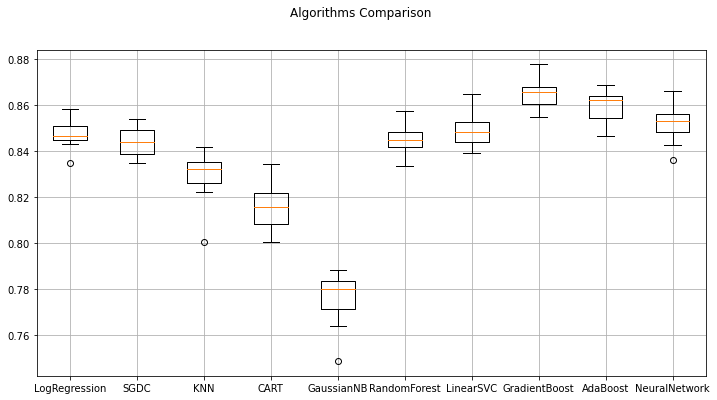

In [186]:
# Plot the result
fig = plt.figure()
fig.set_size_inches(12,6)
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
ax.grid(True)
plt.show()

## 5.2. Models assessment: <a class="anchor" id="5.2"></a>

### 5.2.1 Learning curve: <a class="anchor" id="5.2.1"></a>

Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

In [187]:
def plot_learning_curve(estimators, names, X, y, ylim=None, cv=KFold(n_splits=10),
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex="all", figsize=(16,12))
    sns.set_style("white")
    for estimator, title, ax in zip(estimators, names, axes.flatten()):
        """Generate a simple plot of the test and training learning curve"""
        train_sizes, train_scores, test_scores = learning_curve(
                                                estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

        ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        ax.legend(loc = 'best')
        title = title + " learning curve"
        ax.grid(b= True)
        ax.set_title(title)
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Score")   
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Admin\\anaconda3\\envs\\ML_Lab\\lib\\site-packages\\matplotlib\\pyplot.py'>

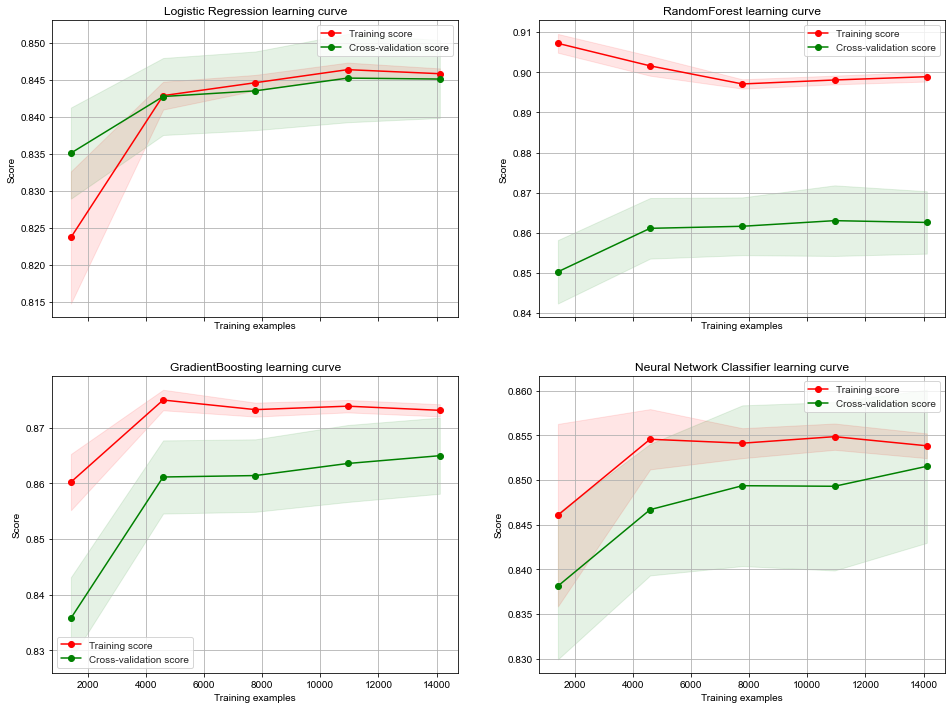

In [188]:
LogR_LC = LogisticRegression(solver='newton-cg',C = 1, max_iter=1000,random_state=2)
RFC_LC = RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=3, min_samples_split=3)
GBC_LC = GradientBoostingClassifier(max_depth=4, max_features=3, min_samples_leaf=100,n_estimators=300)
MLPC_LC = MLPClassifier(hidden_layer_sizes = (25,25,25),
                     activation = 'tanh',
                     solver = 'sgd',
                     learning_rate_init = 0.01,
                     learning_rate = 'adaptive',
                     batch_size = 500,
                     max_iter = 500,
                     momentum=0.9,
                     random_state=2)

estimators = [LogR_LC, RFC_LC, GBC_LC, MLPC_LC]
names = ["Logistic Regression","RandomForest","GradientBoosting","Neural Network Classifier"]
plot_learning_curve(estimators=estimators, names=names, X=X_train, y=y_train)

### 5.2.2. Feature importance: <a class="anchor" id="5.2.2"></a>

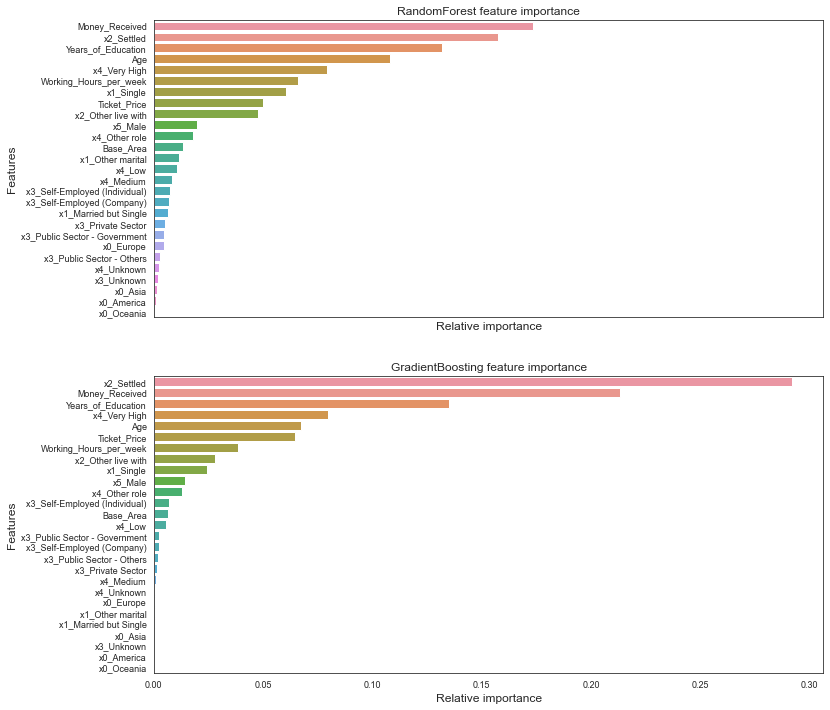

In [189]:
RFC_FS = RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=3, min_samples_split=3)
GBC_FS = GradientBoostingClassifier(max_depth=4, max_features=0.3, min_samples_leaf=100,n_estimators=300)

RFC_FS.fit(X_train,y_train)
GBC_FS.fit(X_train,y_train)

ncols = 1
nrows = 2

fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex="all", figsize=(12,12))

names_classifiers = [("RandomForest",RFC_FS),("GradientBoosting",GBC_FS)]

nclassifier = 0
for row in range(2):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:50]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:50] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

- From the feature importance, we can see that the ranking in the 2 models are different. Thus there prediction result may vary. From this infomation, we can say that their is room for model stacking to access the most information gained from the features.
- For Gradient boosting, the feature ranking is not well normally distributed, we will try to tuning the hyperparameter of this model so that all the information should be more fairly considered

# 5.3. Individual modelling: <a class="anchor" id="5.3"></a>

In [65]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train,digits=4))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val,digits=4))
    print(confusion_matrix(y_val, pred_val))
    

def plot_models_roc_curve(models,X_train,y_train, X_test, y_test):
    fig ,ax = plt.subplots(figsize = (8,8))
    for model in models:
        model.fit(X_train, y_train)
        plot_roc_curve(model, X_test, y_test,ax = ax)      

    plt.title("ROC curve comparison")
    plt.show() 

## 5.3.1. Logistic Regression <a class="anchor" id="5.3.1"></a>

Purpose of testing Logistic Regression:
- Since our data has both types of variables(categorical and numerical), the assumption of linearity in normal regression is already violated(so Linear Regression should not be the way to go).
- By definition, "Logistic regression is the statistical technique used to predict the relationship between predictors (our independent variables) and a predicted variable (the dependent variable) where the dependent variable is binary."(which in our case is the Income feature which is binary).
- Requirements/Limitations:
 - Absence of multicollinearity(not too much correlation between predictors "aka" independent variables)
 - A reasonable amount of observations(larger dataset, better prediction)
 - No outliers(so probably Robust Scaler(instead of MinMax) can have a higher impact in our Logistic Regression F1 - Score)

For improving precision/accuracy in logistic:
 - https://stackoverflow.com/questions/38077190/how-to-increase-the-model-accuracy-of-logistic-regression-in-scikit-python

For improving score by feature selection(Lasso/Ridge/other methods...):
 - https://scikit-learn.org/stable/modules/linear_model.html

### GridSearchCV

In [60]:
### Logistics classifier
LR = LogisticRegression(random_state=2)
LogR_param_grid = {'solver': ['sag','newton-cg','lbfgs'], 
                  'max_iter': [100,200, 500],
                  'C': [1, 10, 50, 100,300],
                  'tol' :[0.0001, 0.00001],
                  }

gsLR = GridSearchCV(LR, param_grid = LogR_param_grid, cv=10, scoring="accuracy", n_jobs= -1, verbose = 1)

gsLR.fit(X_train, y_train)
LR_best = gsLR.best_estimator_

# Best score
gsLR.best_score_, gsLR.best_estimator_

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.9min finished


(0.8485969387755101, LogisticRegression(C=300, random_state=2))

In [62]:
gsLR.best_estimator_.get_params(True)

{'C': 300,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

From the GridSearch above, we are able to identify the best LR model of this dataset:  
-  LogisticRegression(solver='lbfgs', C = 300, tol=0.0001, max_iter=100, tol=0.0001, random_state=2)

### Modelling

In [63]:
model_LogR_final = LogisticRegression(solver='lbfgs', C = 300, tol=0.0001, max_iter=100,random_state=2)
model_LogR_final.fit(X_train,y_train)
y_train_predicted = model_LogR_final.predict(X_train)
y_test_predicted = model_LogR_final.predict(X_test)

In [66]:
metrics(y_train,y_train_predicted,y_test,y_test_predicted)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8763    0.9347    0.9046     11962
           1     0.7326    0.5756    0.6447      3718

    accuracy                         0.8496     15680
   macro avg     0.8045    0.7551    0.7746     15680
weighted avg     0.8422    0.8496    0.8429     15680

[[11181   781]
 [ 1578  2140]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

0.8494642857142857


<AxesSubplot:>

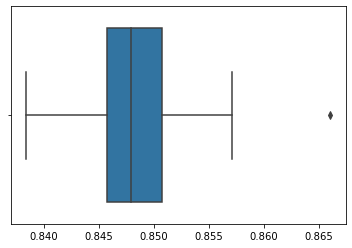

In [67]:
kfold = KFold(n_splits=10,random_state = 2)
score = cross_val_score(model_LogR_final, training_dataset, df_Y, cv=kfold, scoring='f1_micro')
print(score.mean())
sns.boxplot(x = score)

## 5.3.2. Neural Network <a class="anchor" id="5.3.2"></a>

### GridSearchCV

In [195]:
# Gradient boosting tunning
MLPC = MLPClassifier()
gb_param_grid = {'hidden_layer_sizes': [(50,50,50), (50,25), (100,25)],
                'activation': ['tanh', 'relu'],
                'solver': ['sgd'],
                'learning_rate_init': list(np.linspace(0.0001,0.1,3)),
                'learning_rate': ['adaptive'],
                  'momentum' : [0.9,0.7],
                }

gsMLPC = GridSearchCV(MLPC,param_grid = gb_param_grid, cv=5, scoring="f1_micro", n_jobs= -1, verbose = 1)

gsMLPC.fit(X_train,y_train)

MPLC_best = gsMLPC.best_estimator_

# Best score
gsMLPC.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 11.7min finished


0.8535076530612244

In [196]:
MPLC_best

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 25),
              learning_rate='adaptive', learning_rate_init=0.1, momentum=0.7,
              solver='sgd')

From the GridSearch above, we are able to identify the best LR model of this dataset:  
-  MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 25),learning_rate='adaptive', learning_rate_init=0.1, momentum=0.7,solver='sgd')

### Neural Network Modelling:

In [68]:
model_MLPC_final = MLPClassifier(hidden_layer_sizes = (100, 25),
                     activation = 'tanh',
                     solver = 'sgd',
                     learning_rate_init = 0.1,
                     learning_rate = 'adaptive',
                     batch_size = 'auto',
                     max_iter = 300,
                     momentum=0.7,
                     random_state=2)
model_MLPC_final.fit(X_train,y_train)
y_train_predicted = model_MLPC_final.predict(X_train)
y_test_predicted = model_MLPC_final.predict(X_test)

In [69]:
metrics(y_train,y_train_predicted,y_test,y_test_predicted)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8937    0.9381    0.9154     11962
           1     0.7630    0.6409    0.6967      3718

    accuracy                         0.8677     15680
   macro avg     0.8284    0.7895    0.8060     15680
weighted avg     0.8627    0.8677    0.8635     15680

[[11222   740]
 [ 1335  2383]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

0.8552232142857144


<AxesSubplot:>

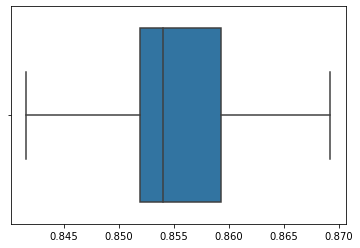

In [70]:
kfold = KFold(n_splits=10,random_state = 2)
score = cross_val_score(model_MLPC_final, training_dataset, df_Y, cv=kfold, scoring='f1_micro')
print(score.mean())
sns.boxplot(x = score)

## 5.3.3. Random Forest <a class="anchor" id="5.3.3"></a>

### GridSearchCV

In [200]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [5, 7, 9],
              "max_features": [1, 3, 7, 10],
              "min_samples_split": [3, 10, 50],
              "min_samples_leaf": [3, 10, 50],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini", "entropy"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=10, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_, gsRFC.best_estimator_

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 21.7min finished


(0.8607142857142858,
 RandomForestClassifier(bootstrap=False, max_depth=9, max_features=10,
                        min_samples_leaf=3, min_samples_split=10,
                        n_estimators=300))

From the GridSearch above, we are able to identify the best RF model of this dataset:  
-  RandomForestClassifier(
    bootstrap=False, max_depth=9, max_features=10,
    min_samples_leaf=3, min_samples_split=10,
    n_estimators=300))

### Random Forest Modelling:

In [78]:
model_RFC_final = RandomForestClassifier(bootstrap=False, max_depth=9, max_features=10,
                                            min_samples_leaf=3, min_samples_split=10, n_estimators=300,
                                         random_state=2)
model_RFC_final.fit(X_train,y_train)
y_train_predicted = model_RFC_final.predict(X_train)
y_test_predicted = model_RFC_final.predict(X_test)

In [79]:
metrics(y_train,y_train_predicted,y_test,y_test_predicted)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8810    0.9610    0.9193     11962
           1     0.8229    0.5823    0.6820      3718

    accuracy                         0.8712     15680
   macro avg     0.8519    0.7717    0.8006     15680
weighted avg     0.8672    0.8712    0.8630     15680

[[11496   466]
 [ 1553  2165]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

0.8614732142857143


<AxesSubplot:>

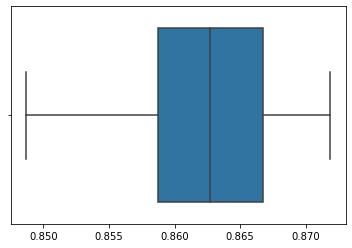

In [80]:
kfold = KFold(n_splits=10,random_state = 2)
score = cross_val_score(model_RFC_final, training_dataset, df_Y, cv=kfold, scoring='f1_micro')
print(score.mean())
sns.boxplot(x = score)

## 5.3.4. Gradient Boosting <a class="anchor" id="5.3.4"></a>

### Hyperparametters tunning:

**max_features**

The number of features to consider when looking for the best split. Increase the number of features too much will make the model prone to overfit

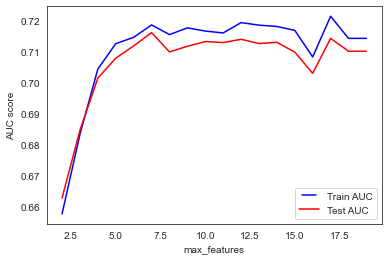

In [287]:
max_features = range(2,20,1)
train_results = []
test_results = []
for max_feat in max_features:
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_features=max_feat, 
                                       subsample=0.8, max_depth =1,  random_state=10,
                                     )
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

max_feature = 7 seems to be the optimum number

**min_samples_split**

This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.

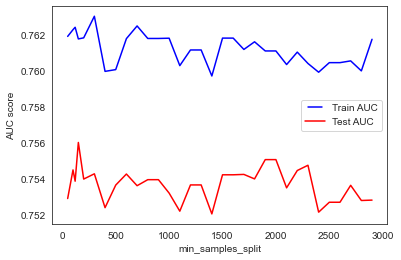

In [288]:
min_samples_splits = [50,100,120,150]+list(range(200,3000,100))
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features=10, 
                                       min_samples_leaf=15,
                                       subsample=0.8, max_depth =3, min_samples_split=min_samples_split, random_state=10)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

min_samples_split=120 is the optimum

**min_samples_leafs**

- Defines the minimum samples (or observations) required in a terminal node or leaf.
- Used to control over-fitting similar to min_samples_split.
- Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.

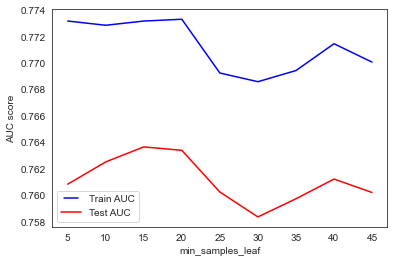

In [289]:
min_samples_leafs = range(5,50,5)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_features=7, 
                                       subsample=0.8, max_depth =4, min_samples_split=100, random_state=10,
                                      min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.show()

min_samples_leaf = 15

**max_depth**

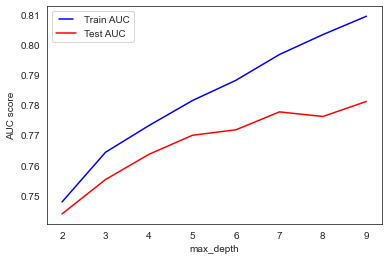

In [290]:
max_depth = range(2,10,1)
train_results = []
test_results = []
for max_dep in max_depth:
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features=7, subsample=0.8, random_state=10,
                                       min_samples_leaf=15,
                                       min_samples_split = 100,
                                       max_depth =max_dep)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depth, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

Increase max_depth too much tend to make to model overfit, thus we will stay at max_depth = 4 as the difference from training set and test set is not so significant

**n_estimators**

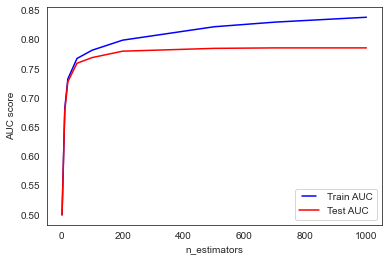

In [291]:
n_estimators = [1, 10,20,50, 100, 200,500,700,1000]
train_results = []
test_results = []
for estimator in n_estimators:
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=estimator, 
                                       max_features=7, 
                                       subsample=0.8, random_state=10,
                                       min_samples_leaf=15,
                                       min_samples_split = 100,
                                       max_depth =4)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

The testing accuracy does seem to be stable with larger n_estimators

### GridSearchCV:

In [297]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier(random_state=10)
gb_param_grid = {'loss' : ["deviance", 'exponential'],
              'learning_rate': [0.1, 0.07,0.05,0.03, 0.01], 
              'n_estimators':[60,100,150,200,500,700], 
              'max_features':[7], 
              'subsample':[0.8],
              'min_samples_leaf':[15],
              'min_samples_split' : [120],
              'max_depth' :[4]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=KFold(n_splits=10), scoring="accuracy", n_jobs= -1, verbose = 1)
gsGBC.fit(training_dataset, df_Y)
GBC_best = gsGBC.best_estimator_
# Best score
gsGBC.best_score_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.2min finished


0.8696428571428572

In [308]:
gsGBC.best_estimator_

GradientBoostingClassifier(max_depth=4, max_features=7, min_samples_leaf=15,
                           min_samples_split=120, n_estimators=500,
                           random_state=10, subsample=0.8)

From the GridSearch above, we are able to identify the best GB model of this dataset:  
-  GradientBoostingClassifier(max_depth=4, max_features=7, min_samples_leaf=15,
     min_samples_split=120, n_estimators=500,
     random_state=10, subsample=0.8)

### Gradient Boosting modelling:

In [96]:
model_GBC_final = GradientBoostingClassifier(learning_rate=0.1, 
                                 loss = 'deviance',
                                 max_depth=4, 
                                 max_features=7, 
                                 min_samples_leaf=15,                         
                                 min_samples_split=120,
                                 n_estimators=500, 
                                 subsample=0.8,
                                 warm_start = False,
                                 random_state = 10)
model_GBC_final.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, max_features=7, min_samples_leaf=15,
                           min_samples_split=120, n_estimators=500,
                           random_state=10, subsample=0.8)

In [317]:
y_train_predicted = model_GBC_final.predict(X_train)
y_test_predicted = model_GBC_final.predict(X_test)
metrics(y_train,y_train_predicted,y_test,y_test_predicted)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9086    0.9503    0.9290     11962
           1     0.8126    0.6926    0.7478      3718

    accuracy                         0.8892     15680
   macro avg     0.8606    0.8215    0.8384     15680
weighted avg     0.8859    0.8892    0.8860     15680

[[11368   594]
 [ 1143  2575]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8696428571428572


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   35.8s finished


<AxesSubplot:>

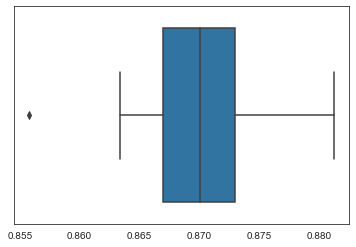

In [318]:
kfold = KFold(n_splits=10,random_state = 2)
score = cross_val_score(model_GBC_final, training_dataset, df_Y, cv=kfold, scoring='f1_micro',verbose=1)
print(score.mean())
sns.boxplot(x = score)

# 5.4. Comparing models: <a class="anchor" id="5.4"></a>

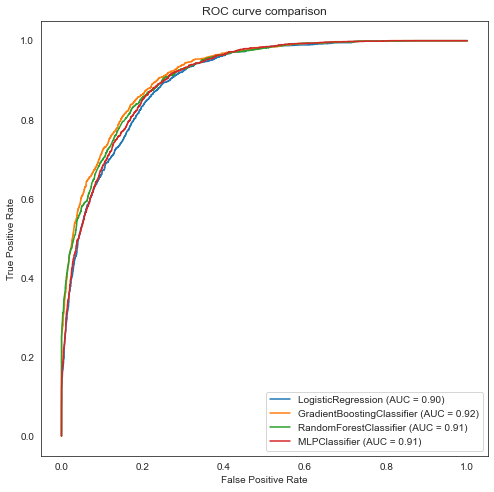

In [319]:
plot_models_roc_curve([model_LogR_final,model_GBC_final,model_RFC_final,model_MLPC_final],
                      X_train, y_train,X_test,y_test)

# 6. Model ensembles <a class="anchor" id="6"></a>

Bellow are the best tunned models from the individual model assessment in section 5. In this section, we will try 2 ensembling method on these model

In [82]:
rf = model_RFC_final
lr = model_LogR_final
nn = model_MLPC_final
gb = model_GBC_final

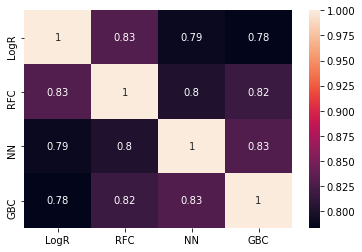

In [83]:
rf.fit(X_train,y_train)
nn.fit(X_train,y_train)
gb.fit(X_train,y_train)
lr.fit(X_train,y_train)


test_RFC = pd.Series(rf.predict(X_test), name="RFC")
test_NN = pd.Series(nn.predict(X_test), name="NN")
test_GBC = pd.Series(gb.predict(X_test), name="GBC")
test_LR = pd.Series(lr.predict(X_test), name="LogR")


# Concatenate all classifier results
ensemble_results = pd.concat([test_LR,test_RFC,test_NN,test_GBC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

The 4 classifiers give more or less the same prediction but there is some differences. Theses differences between the 4 classifier predictions are sufficient to consider an ensemble model

## 6.1. Ensembling <a class="anchor" id="6.1"></a>

In [84]:
votingC = VotingClassifier(estimators=[ ('lr',lr),
                                        ('nn', nn),
                                        ('rfc', rf),
                                        ('gbc',gb)], 
                                        voting='soft', n_jobs=-1)

votingC = votingC.fit(X_train, y_train)

In [85]:
y_train_predicted = votingC.predict(X_train)
y_test_predicted = votingC.predict(X_test)
metrics(y_train,y_train_predicted,y_test,y_test_predicted)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8911    0.9524    0.9208     11962
           1     0.8035    0.6256    0.7035      3718

    accuracy                         0.8749     15680
   macro avg     0.8473    0.7890    0.8121     15680
weighted avg     0.8703    0.8749    0.8692     15680

[[11393   569]
 [ 1392  2326]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

0.8626339285714286


<AxesSubplot:>

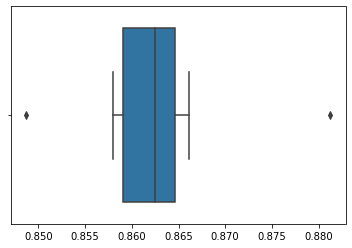

In [86]:
kfold = KFold(n_splits=10,random_state = 2)
score = cross_val_score(votingC, training_dataset, df_Y, cv=kfold, scoring='f1_micro')
print(score.mean())
sns.boxplot(x = score)

## 6.2. Stacking <a class="anchor" id="6.2"></a>

In [325]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from mlens.ensemble import SuperLearner 
# https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de
# http://ml-ensemble.com/info/tutorials/start.html#multi-layer-ensembles
### Find the best combination of stacking

seed = 2
np.random.seed(seed)

names = ['Logistic Regression', 'Random Forest', 'Neuron Network', 'Gradient Boosting']
clf_array = [lr, rf, nn, gb]

def zip_stacked_classifiers(clf_array, names):
    a = []
    clf_zip = []
    name_zip = []    
    for i in range(2, len(clf_array) + 1):
        combined_items = [list(x) for x in list(combinations(clf_array, i))]
        clf_zip = clf_zip+combined_items 
    for i in range(2, len(names) + 1):
        combined_items = [list(x) for x in list(combinations(names, i))]
        name_zip = name_zip+ combined_items    
    return list(zip(clf_zip,name_zip))

stacked_clf_list =zip_stacked_classifiers(clf_array, names)
best_combination = [0.00, ""]
accuracy_dict = {}
for clf in stacked_clf_list:   
    ensemble = SuperLearner(scorer = accuracy_score, 
                            random_state = seed, 
                            folds = 10)
    ensemble.add(clf[0])
    ensemble.add_meta(LogisticRegression())
    ensemble.fit(X_train, y_train)
    preds = ensemble.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    accuracy_dict[str(clf[1])] = accuracy
    if accuracy > best_combination[0]:
        best_combination[0] = accuracy
        best_combination[1] = clf[1]
    
    print("Accuracy score: %.4f - %s" %(accuracy, clf[1]))
    
print("\nBest stacking model is %s with accuracy of: %.4f" %(best_combination[1], best_combination[0]))

Accuracy score: 0.8613 - ['Logistic Regression', 'Random Forest']
Accuracy score: 0.8536 - ['Logistic Regression', 'Neuron Network']
Accuracy score: 0.8680 - ['Logistic Regression', 'Gradient Boosting']
Accuracy score: 0.8580 - ['Random Forest', 'Neuron Network']
Accuracy score: 0.8680 - ['Random Forest', 'Gradient Boosting']
Accuracy score: 0.8680 - ['Neuron Network', 'Gradient Boosting']
Accuracy score: 0.8594 - ['Logistic Regression', 'Random Forest', 'Neuron Network']
Accuracy score: 0.8688 - ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
Accuracy score: 0.8680 - ['Logistic Regression', 'Neuron Network', 'Gradient Boosting']
Accuracy score: 0.8685 - ['Random Forest', 'Neuron Network', 'Gradient Boosting']
Accuracy score: 0.8688 - ['Logistic Regression', 'Random Forest', 'Neuron Network', 'Gradient Boosting']

Best stacking model is ['Logistic Regression', 'Random Forest', 'Gradient Boosting'] with accuracy of: 0.8688


In [326]:
#estimators = [('rf', rf),('gb',gb),('nn',nn)]
estimators = [('gb',gb),('lr',lr),('rf', rf)]
sc = StackingClassifier(estimators=estimators, 
                        final_estimator=LogisticRegression(),
                        stack_method='auto',
                         n_jobs=-1)

In [327]:
sc.fit(X_train, y_train)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(max_depth=4,
                                                           max_features=7,
                                                           min_samples_leaf=15,
                                                           min_samples_split=120,
                                                           n_estimators=500,
                                                           random_state=10,
                                                           subsample=0.8)),
                               ('lr',
                                LogisticRegression(C=50, max_iter=500,
                                                   random_state=2)),
                               ('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=9,
                                                       max_features=

In [328]:
y_train_predicted = sc.predict(X_train)
y_pred_sc = sc.predict(X_test)
metrics(y_train,y_train_predicted,y_test,y_pred_sc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9021    0.9533    0.9270     11962
           1     0.8161    0.6673    0.7342      3718

    accuracy                         0.8855     15680
   macro avg     0.8591    0.8103    0.8306     15680
weighted avg     0.8817    0.8855    0.8813     15680

[[11403   559]
 [ 1237  2481]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

0.8687053571428572


<AxesSubplot:>

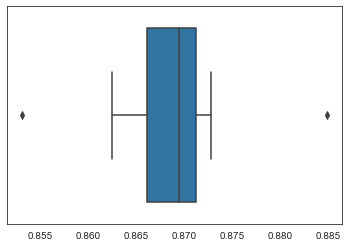

In [329]:
kfold = KFold(n_splits=10,random_state = 2)
score = cross_val_score(sc, training_dataset, df_Y, cv=kfold, scoring='f1_micro')
print(score.mean())
sns.boxplot(x = score)

## 6.3. Final comparision: <a class="anchor" id="6.3"></a>

In [330]:
random_state = 2
models = []

# Gradient boosting model
models.append(('Gradient Boosting', gb))
# Ensemble
models.append(('Voting ensemble', votingC)) 
#Stacking model
models.append(('Stacking LR, RF & GB ', sc))

# evalutate each model in turn
results = []
names = []
scores = {}
for name, model in models:
    # Set up kfold with number of splits = 10
    kfold = KFold(n_splits=10)
    # start counting time
    begin = time.perf_counter()
    # Run cross-validation on training set
    cv_results = cross_val_score(model, training_dataset, df_Y , cv=kfold, scoring='f1_micro')
    # finish counting time
    end = time.perf_counter()
    
    results.append(cv_results)
    names.append(name)
    # assign infomation
    avg_time = (end-begin)/10
    avg_score = round(np.mean(cv_results),4)
    std_score = round(np.std(cv_results),3)
    # assign infomation
    scores[name] = [avg_score, '+/-' + str(std_score), round(np.min(cv_results),4), round(np.max(cv_results),4) ,round(avg_time,3)]

final_score = pd.DataFrame.from_dict(scores,orient='index',columns=['Average score','Std', 'Min', 'Max', 'Average training time'])
final_score

,Average score,Std,Min,Max,Average training time
Gradient Boosting,0.8696,+/-0.007,0.8558,0.8812,3.556
Voting ensemble,0.8629,+/-0.008,0.8513,0.8812,17.693
"Stacking LR, RF & GB",0.8687,+/-0.007,0.8540,0.8844,10.511


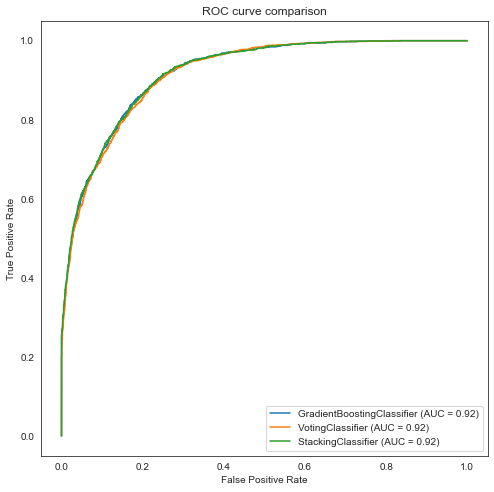

In [331]:
plot_models_roc_curve([gb, votingC, sc], X_train, y_train,X_test,y_test)

# 7. Submission<a class="anchor" id="7"></a>

In [97]:
model_GBC_final.fit(training_dataset,df_Y)
y_predicted = model_GBC_final.predict(test_dataset)
submission = pd.DataFrame({'CITIZEN_ID': test_dataset.index, 'Income': y_predicted})

filename = 'predict_GB_Final.csv'
submission.to_csv(filename, index=False)

# --------------------------------------------------- END ---------------------------------------------------

# 8. Appendix <a class="anchor" id="8"></a>

## 8.1. Generalized Linear Mixed Model Encoding: <a class="anchor" id="8.1"></a>

#### **Please skip this section if using other method of encoding**

In [87]:
# save to new variable
df_glmm = data.copy()
df_test_glmm = test_data.copy()

# to make it easier to work with columns
df_glmm.columns = data.columns.str.replace(' ', '_', regex=True)
df_test_glmm.columns = test_data.columns.str.replace(' ', '_', regex=True)

# Set index as citizen ID
df_glmm.set_index(['CITIZEN_ID'], inplace = True)
df_test_glmm.set_index(['CITIZEN_ID'], inplace = True)


# Feature engineering
# apply on dataframe
df_glmm = gender_generator(df_glmm)
df_test_glmm = gender_generator(df_test_glmm)

# apply on dataframe
df_glmm = age_generator(df_glmm)
df_test_glmm = age_generator(df_test_glmm)

#replace '?' with NaN value to easily detect
df_glmm.replace( '\?', np.nan, regex=True, inplace = True)
df_test_glmm.replace( '\?', np.nan, regex=True, inplace = True)

# Fill NaN values in categorical features using Unknown class
contain_NA_feats = ['Base_Area', 'Employment_Sector', 'Role']
df_glmm.fillna('Unknown',inplace = True)
df_test_glmm.fillna('Unknown',inplace = True)



In [88]:
target ='Income'
numeric_glmm = df_glmm.columns[(df_glmm.dtypes != 'O') & (df_glmm.columns != target)].tolist()
categorical_glmm = df_test_glmm.columns[df_test_glmm.dtypes == 'O'].tolist()
# For the splited train dataset as train and test set
df_X_glmm = df_glmm.loc[:,df_glmm.columns != target]
df_Y_glmm = df_glmm.loc[:,df_glmm.columns == target]

In [89]:
# Split the dataset
X_train_glmm, X_test_glmm, y_train_glmm, y_test_glmm = train_test_split(df_X_glmm, df_Y_glmm, test_size=0.3, stratify = df_Y_glmm, random_state=2)

def glmmEncode_Scaler_pipeline(X_train, y_train, X_test, scaler = MinMaxScaler()): 
    X_train_encoded = X_train.copy()
    X_test_encoded= X_test.copy()
    # Set up feature to encode
    feature_to_encode = X_train.columns[X_train.dtypes == 'O'].tolist()
    # Initia the encoder model
    GLMMEncoder = ce.glmm.GLMMEncoder()
    # fit the train data
    GLMMEncoder.fit(X_train[feature_to_encode],y_train)

    # transform training set
    X_train_encoded[feature_to_encode] = GLMMEncoder.transform(X_train[feature_to_encode])
    # transform test set
    X_test_encoded[feature_to_encode] = GLMMEncoder.transform(X_test[feature_to_encode])

    # setup MINMAXSCALER
    scaler = MinMaxScaler()
    # fit the scaler                    
    scaler.fit(X_train_encoded)
    # transform training set
    X_train_scaled = pd.DataFrame(scaler.transform(X_train_encoded), columns=X_train_encoded.columns, index=X_train_encoded.index)
    # transform test set
    X_test_scaled = pd.DataFrame(scaler.transform(X_test_encoded), columns=X_test_encoded.columns, index=X_test_encoded.index)
    # store back
    return (X_train_scaled, X_test_scaled)

    
X_train_glmm, X_test_glmm =  glmmEncode_Scaler_pipeline(X_train_glmm, y_train_glmm, X_test_glmm)
training_dataset_glmm, test_dataset_glmm= glmmEncode_Scaler_pipeline(df_X_glmm, df_Y_glmm, df_test_glmm)
    

In [90]:
print('Train set:', X_train_glmm.shape)
print('Test set:', X_test_glmm.shape)
print('Whole training set set:', training_dataset_glmm.shape)
print('Whole test set:', test_dataset_glmm.shape)

Train set: (15680, 13)
Test set: (6720, 13)
Whole training set set: (22400, 13)
Whole test set: (10100, 13)


In [91]:
def CV_pipeline(df_X, df_Y, model,  fold = 8):
    kf = KFold(n_splits= fold)
    score = []
    for train, test in kf.split(df_X, df_Y):
        X_train, X_test, y_train, y_test = df_X.iloc[train,:], df_X.iloc[test,:], df_Y.iloc[train,:],  df_Y.iloc[test,:]
        X_train_scaled, X_test_scaled = glmmEncode_Scaler_pipeline(X_train, y_train, X_test)
        clf = model
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        score.append(f1_score(y_test, y_pred, average ='micro'))
    return score
        
model_GBC_glmm = GradientBoostingClassifier(learning_rate=0.06, 
                                 loss = 'exponential',
                                 max_depth=3, 
                                 max_features=4, 
                                 min_samples_leaf=10,                         
                                 min_samples_split=50,
                                 n_estimators=900, 
                                 subsample=0.9,
                                 warm_start = False,
                                 random_state = 2)

In [92]:
score = CV_pipeline(df_X_glmm.drop(['Education_Level'],axis = 1), 
                    df_Y_glmm, 
                    model_GBC_glmm, 
                    fold = 10)

In [98]:
np.mean(score)

0.8708035714285713

<AxesSubplot:>

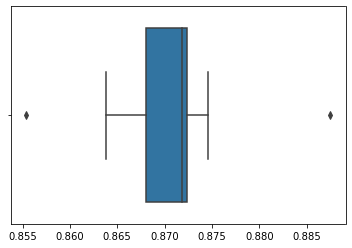

In [94]:
sns.boxplot(score)

In [95]:
random_state = 2
models = []
#Logistic Regression
models.append(('LogRegression', LogisticRegression(solver='sag',C = 5, max_iter=1000,random_state=random_state)))
# SGDC which is also a linear classisifer
models.append(('SGDC', SGDClassifier(loss='log',random_state=random_state)))
#KNN
models.append(('KNN', KNeighborsClassifier()))
#Decision Tree 
models.append(('CART', DecisionTreeClassifier(random_state=random_state)))
#Gaussian
models.append(('GaussianNB', GaussianNB()))
#Random Forest
models.append(('RandomForest', RandomForestClassifier(n_estimators=100, max_features=3,random_state=2)))
#Linear support Vector Machine 
models.append(('LinearSVC', LinearSVC(random_state=random_state)))
# Gradient Boosting
models.append(('GradientBoost', GradientBoostingClassifier(random_state=random_state)))
# AdaBoost
models.append(('AdaBoost', AdaBoostClassifier(random_state=random_state)))
# Neural Network
models.append(('NeuralNetwork', MLPClassifier(random_state=random_state))) 
# evalutate each model in turn
results = []
names = []
scores = {}
for name, model in models:
    # Set up kfold with number of splits = 10
    kfold = KFold(n_splits=10)
    # start counting time
    begin = time.perf_counter()
    # Run cross-validation on training set
    cv_results = cross_val_score(model, X_train_glmm, y_train_glmm, cv=kfold, scoring='f1_micro')
    # finish counting time
    end = time.perf_counter()
    
    results.append(cv_results)
    names.append(name)
    # assign infomation
    avg_time = (end-begin)/10
    avg_score = round(np.mean(cv_results),4)
    std_score = round(np.std(cv_results),3)
    # assign infomation
    scores[name] = [avg_score, '+/-' + str(std_score), round(np.min(cv_results),4), round(np.max(cv_results),4) ,round(avg_time,3)]

final_score = pd.DataFrame.from_dict(scores,orient='index',columns=['Average score','Std', 'Min', 'Max', 'Average training time'])
final_score

,Average score,Std,Min,Max,Average training time
LogRegression,0.8477,+/-0.008,0.8348,0.8616,0.082
SGDC,0.8402,+/-0.008,0.8291,0.8546,0.046
KNN,0.8291,+/-0.005,0.8189,0.8348,0.283
CART,0.8128,+/-0.006,0.8036,0.8253,0.040
GaussianNB,0.8356,+/-0.007,0.8189,0.8438,0.009
RandomForest,0.8480,+/-0.008,0.8316,0.8597,0.876
LinearSVC,0.8491,+/-0.009,0.8380,0.8648,0.133
GradientBoost,0.8664,+/-0.009,0.8559,0.8865,0.896
AdaBoost,0.8621,+/-0.009,0.8527,0.8833,0.328
NeuralNetwork,0.8524,+/-0.009,0.8438,0.8705,8.921


## 8.2. Thresholds optimizing <a class="anchor" id="8.2"></a>

In [354]:
from numpy import arange
from numpy import argmax

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
# apply threshold to positive probabilities to create labels
def threshold_tunning(X_train, y_train, model):
    probs = model.predict_proba(X_train)[:, 1]
    # define thresholds
    thresholds = arange(0, 1, 0.001)
    # evaluate each threshold
    scores = [f1_score(y_train, to_labels(probs, t), average='micro') for t in thresholds]
    # get best threshold
    ix = argmax(scores)
    print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
    return thresholds[ix]
def CV_threshold_pipeline(df_X, df_Y, model,  fold = 10):
    kf = KFold(n_splits= fold)
    threshold_train = []
    threshold_test = []
    for train, test in kf.split(df_X, df_Y):
        X_train, X_test, y_train, y_test = df_X.iloc[train,:], df_X.iloc[test,:], df_Y.iloc[train,:],  df_Y.iloc[test,:]
        print('---------Train---------')
        threshold_train.append(threshold_tunning(X_train, y_train, model))
        print('---------Test----------')
        threshold_test.append(threshold_tunning(X_test, y_test, model))
    return (threshold_train, threshold_test)
        
Threshold = CV_threshold_pipeline(training_dataset, df_Y, gb)
print('-----------------------')
print('Mean threshold trainset', np.mean(Threshold[0]))
print('Mean threshold testset', np.mean(Threshold[1]))

---------Train---------
Threshold=0.481, F-Score=0.88626
---------Test----------
Threshold=0.446, F-Score=0.88571
---------Train---------
Threshold=0.481, F-Score=0.88785
---------Test----------
Threshold=0.372, F-Score=0.87455
---------Train---------
Threshold=0.481, F-Score=0.88626
---------Test----------
Threshold=0.456, F-Score=0.88795
---------Train---------
Threshold=0.481, F-Score=0.88616
---------Test----------
Threshold=0.544, F-Score=0.88661
---------Train---------
Threshold=0.461, F-Score=0.88686
---------Test----------
Threshold=0.550, F-Score=0.88482
---------Train---------
Threshold=0.481, F-Score=0.88537
---------Test----------
Threshold=0.453, F-Score=0.89821
---------Train---------
Threshold=0.481, F-Score=0.88581
---------Test----------
Threshold=0.484, F-Score=0.88929
---------Train---------
Threshold=0.481, F-Score=0.88586
---------Test----------
Threshold=0.452, F-Score=0.88929
---------Train---------
Threshold=0.480, F-Score=0.88433
---------Test----------
Thresho

In [111]:
def CV_pipeline_threshold(df_X, df_Y, model,  fold = 8):
    kf = KFold(n_splits= fold,random_state=2)
    score = []
    for train, test in kf.split(df_X, df_Y):
        X_train, X_test, y_train, y_test = df_X.iloc[train,:], df_X.iloc[test,:], df_Y.iloc[train,:],  df_Y.iloc[test,:]
        X_train_scaled, X_test_scaled = glmmEncode_Scaler_pipeline(X_train, y_train, X_test)
        clf = model
        clf.fit(X_train_scaled, y_train)
        y_predicted = model.predict_proba(X_test)
        pred_threshold = to_labels(y_predicted[:, 1],0.4789)
        score.append(f1_score(y_test, pred_threshold, average ='micro'))
    return score

In [112]:
model_GBC_threshold = GradientBoostingClassifier(max_depth=4,
                                                           max_features=7,
                                                           min_samples_leaf=15,
                                                           min_samples_split=120,
                                                           n_estimators=500,
                                                           random_state=10,
                                                           subsample=0.8)
score = CV_pipeline_threshold(training_dataset, 
                    df_Y, 
                    model_GBC_threshold, 
                    fold = 10)

Average CV score 0.8689 +/- 0.0073


<AxesSubplot:>

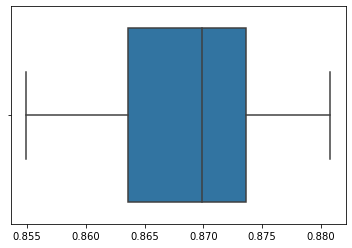

In [114]:
print('Average CV score', round(np.mean(score),4), '+/-', round(np.std(score),4))
sns.boxplot(score)

In [349]:
model_GBC_final.fit(training_dataset,df_Y)
y_predicted = model_GBC_final.predict_proba(test_dataset)
pred_threshold = to_labels(y_predicted[:, 1],0.479)

In [352]:
submission = pd.DataFrame({'CITIZEN_ID': test_dataset.index, 'Income': pred_threshold})
filename = 'predict_gb_threshold.csv'
submission.to_csv(filename, index=False)